In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


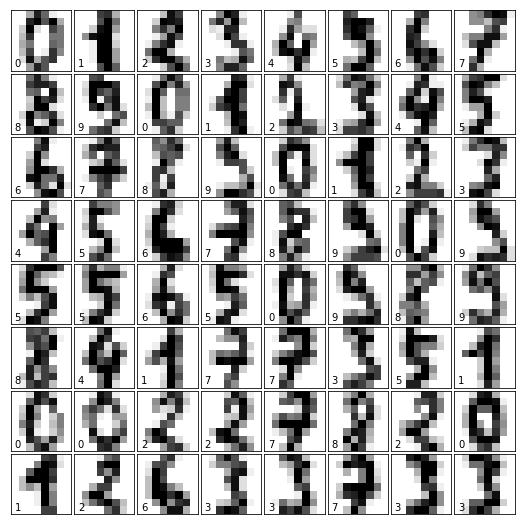

In [5]:
# copied from notebook 02A_representation_of_data.ipynb
fig = plt.figure(figsize=(7, 7))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
    

In [6]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(n_components=2)
proj = pca.fit_transform(digits.data)

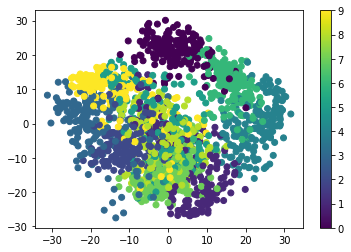

In [7]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

In [8]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(digits.data)

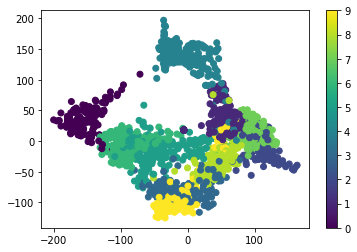

In [9]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [11]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

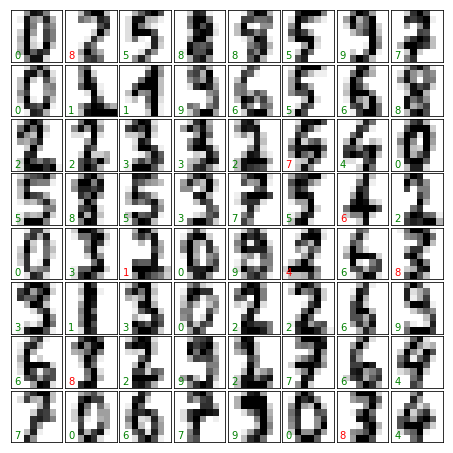

In [12]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [13]:
matches = (predicted == expected)
matches.sum()
len(matches)

450

In [14]:

matches.sum() / float(len(matches))


0.8711111111111111

In [15]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.91      0.75      0.82        40
           2       0.98      0.82      0.89        50
           3       0.97      0.66      0.79        50
           4       0.92      0.85      0.88        39
           5       0.92      0.94      0.93        51
           6       0.88      0.98      0.92        44
           7       0.82      1.00      0.90        46
           8       0.63      0.93      0.75        42
           9       0.82      0.78      0.79        40

   micro avg       0.87      0.87      0.87       450
   macro avg       0.88      0.87      0.87       450
weighted avg       0.89      0.87      0.87       450



In [16]:
print(metrics.confusion_matrix(expected, predicted))

[[48  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  1  1  2  6]
 [ 0  1 41  0  1  0  0  0  7  0]
 [ 0  0  1 33  0  3  0  1 11  1]
 [ 0  0  0  0 33  0  3  2  1  0]
 [ 0  0  0  0  0 48  1  2  0  0]
 [ 0  0  0  0  0  1 43  0  0  0]
 [ 0  0  0  0  0  0  0 46  0  0]
 [ 0  1  0  1  0  0  0  1 39  0]
 [ 0  1  0  0  2  0  1  3  2 31]]


In [17]:
from xgboost import XGBClassifier

In [18]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [19]:
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]

In [20]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.22%


In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       0.89      1.00      0.94        40
           2       1.00      0.96      0.98        50
           3       0.96      0.94      0.95        50
           4       0.97      0.90      0.93        39
           5       1.00      0.96      0.98        51
           6       0.98      0.98      0.98        44
           7       1.00      0.98      0.99        46
           8       0.97      0.93      0.95        42
           9       0.91      0.97      0.94        40

   micro avg       0.96      0.96      0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450

